In [1]:
install.packages("cancensus")
install.packages("tidyverse")
install.packages("tidyr")
install.packages("dplyr")
install.packages("knitr")

library("knitr")
library("dplyr")
library("cancensus")
library("tidyverse")
library("tidyr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘xfun’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Census data is currently stored temporarily.

 In order to speed up performance, reduce API quota usage, and reduce unnecessary network calls, please set up a persistent cache directory via `set_cancensus_cache_path('<local cache path>', install = TRUE)`.
 This will add your cache directory as environment varianble to your .Renviron to be used across s

In [2]:
load("data_crime_nosf.rda") 

ls()

[1] "census_data_crime"

In [3]:
n <- nrow(census_data_crime)
glimpse(census_data_crime)

Rows: 3,590
Columns: 84
$ Shape.Area                                                                                                                                                <dbl> …
$ Quality.Flags                                                                                                                                             <chr> …
$ GeoUID                                                                                                                                                    <chr> …
$ Type                                                                                                                                                      <fct> …
$ Households                                                                                                                                                <int> …
$ CD_UID                                                                                                                                                    

In [4]:
head(census_data_crime)


Shape.Area Quality.Flags GeoUID   Type Households CD_UID Dwellings Population
1 0.8517     0             59150004 DA   166        5915   177       362       
2 0.1660     0             59150005 DA   205        5915   221       526       
3 0.1559     0             59150006 DA   192        5915   199       452       
4 0.7211     0             59150007 DA   211        5915   225       545       
5 0.6600     0             59150008 DA   220        5915   235       596       
6 0.5699     0             59150009 DA   143        5915   148       393       
  name     CSD_UID ⋯ crimes_Break.and.Enter.Residential.Other crimes_Homicide
1 59150004 5915055 ⋯ 0                                        0              
2 59150005 5915055 ⋯ 0                                        0              
3 59150006 5915055 ⋯ 0                                        0              
4 59150007 5915055 ⋯ 0                                        0              
5 59150008 5915055 ⋯ 0                                        0              
6 59150009 5915055 ⋯ 0                                        0              
  crimes_Mischief crimes_Offence.Against.a.Person crimes_Other.Theft
1 0               0                               0                 
2 0               0                               0                 
3 0               0                               0                 
4 0               0                               0                 
5 0               0                               0                 
6 0               0                               0                 
  crimes_Theft.from.Vehicle crimes_Theft.of.Bicycle crimes_Theft.of.Vehicle
1 0                         0                       0                      
2 0                         0                       0                      
3 0                         0                       0                      
4 0                         0                       0                      
5 0                         0                       0                      
6 0                         0                       0                      
  crimes_Vehicle.Collision.or.Pedestrian.Struck..with.Fatality.
1 0                                                            
2 0                                                            
3 0                                                            
4 0                                                            
5 0                                                            
6 0                                                            
  crimes_Vehicle Collision or Pedestrian Struck (with Injury)
1 0                                                          
2 0                                                          
3 0                                                          
4 0                                                          
5 0                                                          
6 0

In [5]:
# Adding population density to the dataset
census_data_crime <-census_data_crime %>%
  mutate(Population_Density = Population / Area..sq.km.)


In [6]:

quant_summary <- census_data_crime %>% 
  summarize(variable = "Average Age", 
            mean = mean(`v_CA21_388..Average.age`, na.rm = TRUE), 
            sd = sd(`v_CA21_388..Average.age`, na.rm = TRUE), 
            max = max(`v_CA21_388..Average.age`, na.rm = TRUE), 
            min = min(`v_CA21_388..Average.age`, na.rm = TRUE)) %>%
  bind_rows(
    census_data_crime %>% 
      summarize(variable = "Gini Index", 
                mean = mean(`v_CA21_1140..Gini.index.on.adjusted.household.total.income`, na.rm = TRUE), 
                sd = sd(`v_CA21_1140..Gini.index.on.adjusted.household.total.income`, na.rm = TRUE), 
                max = max(`v_CA21_1140..Gini.index.on.adjusted.household.total.income`, na.rm = TRUE), 
                min = min(`v_CA21_1140..Gini.index.on.adjusted.household.total.income`, na.rm = TRUE))
  ) %>%
  bind_rows(
    census_data_crime %>% 
      summarize(variable = "Education Level", 
                mean = mean(`v_CA21_5817..Total...Highest.certificate..diploma.or.degree.for.the.population.aged.15.years.and.over.in.private.households`, na.rm = TRUE), 
                sd = sd(`v_CA21_5817..Total...Highest.certificate..diploma.or.degree.for.the.population.aged.15.years.and.over.in.private.households`, na.rm = TRUE), 
                max = max(`v_CA21_5817..Total...Highest.certificate..diploma.or.degree.for.the.population.aged.15.years.and.over.in.private.households`, na.rm = TRUE), 
                min = min(`v_CA21_5817..Total...Highest.certificate..diploma.or.degree.for.the.population.aged.15.years.and.over.in.private.households`, na.rm = TRUE))
  )%>%
  bind_rows(
    census_data_crime %>% 
      summarize(variable = "Break and Enter Crime Residential/Other", 
                mean = mean(`crimes_Break.and.Enter.Residential.Other`, na.rm = TRUE), 
                sd = sd(`crimes_Break.and.Enter.Residential.Other`, na.rm = TRUE), 
                max = max(`crimes_Break.and.Enter.Residential.Other`, na.rm = TRUE), 
                min = min(`crimes_Break.and.Enter.Residential.Other`, na.rm = TRUE))
  )%>%
  bind_rows(
    census_data_crime %>% 
      summarize(variable = "Mischief Crime", 
                mean = mean(`crimes_Mischief`, na.rm = TRUE), 
                sd = sd(`crimes_Mischief`, na.rm = TRUE), 
                max = max(`crimes_Mischief`, na.rm = TRUE), 
                min = min(`crimes_Mischief`, na.rm = TRUE))
  )%>%
  bind_rows(
    census_data_crime %>% 
      summarize(variable = "Population Density", 
                mean = mean(`Population_Density`, na.rm = TRUE), 
                sd = sd(`Population_Density`, na.rm = TRUE), 
                max = max(`Population_Density`, na.rm = TRUE), 
                min = min(`Population_Density`, na.rm = TRUE))
      )

# View the summary table
quant_summary


variable                                mean         sd           max      
1 Average Age                               43.0246292 5.559827e+00    86.000
2 Gini Index                                 0.3308630 7.996311e-02     0.752
3 Education Level                          626.3098907 4.484760e+02  7855.000
4 Break and Enter Crime Residential/Other    0.3091922 1.026915e+00    15.000
5 Mischief Crime                             1.8484680 1.088369e+01   352.000
6 Population Density                      6457.5899578 7.609169e+03 76474.359
  min   
1 21.000
2  0.194
3 40.000
4  0.000
5  0.000
6  0.000

In [7]:
# Filter and rename variables in one step
filtered_data <- census_data_crime |>
  select(
    # Select variables of interest and rename them
    Break_and_Enter_Crime_Residential_Other = crimes_Break.and.Enter.Residential.Other,
    Mischief = crimes_Mischief,
    Average_Age = v_CA21_388..Average.age, 
    Gini_Index = v_CA21_1140..Gini.index.on.adjusted.household.total.income, 
    Education_Level = v_CA21_5817..Total...Highest.certificate..diploma.or.degree.for.the.population.aged.15.years.and.over.in.private.households,
    Population,
    Area_sq_km = Area..sq.km.,
    Population_Density = Population_Density  
  )
# Add squared term for Average Age
filtered_data <- filtered_data %>%
  mutate(Average_Age_Squared = Average_Age^2)

# View the structure of the filtered and renamed dataset
str(filtered_data)

# Display the first few rows of the cleaned dataset
head(filtered_data)

'data.frame':	3590 obs. of  9 variables:
 $ Break_and_Enter_Crime_Residential_Other: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Mischief                               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Average_Age                            : num  53 46.2 43.8 49.4 46.6 45 46 45 44.8 48.9 ...
 $ Gini_Index                             : num  0.448 0.362 0.44 0.478 0.684 0.55 0.5 0.49 0.5 0.542 ...
 $ Education_Level                        : num  310 385 395 445 480 ...
 $ Population                             : int  362 526 452 545 596 393 855 525 311 1172 ...
 $ Area_sq_km                             : num  0.852 0.166 0.156 0.721 0.66 ...
 $ Population_Density                     : num  425 3169 2899 756 903 ...
 $ Average_Age_Squared                    : num  2809 2134 1918 2440 2172 ...


Break_and_Enter_Crime_Residential_Other Mischief Average_Age Gini_Index
1 0                                       0        53.0        0.448     
2 0                                       0        46.2        0.362     
3 0                                       0        43.8        0.440     
4 0                                       0        49.4        0.478     
5 0                                       0        46.6        0.684     
6 0                                       0        45.0        0.550     
  Education_Level Population Area_sq_km Population_Density Average_Age_Squared
1 310             362        0.8517      425.0323          2809.00            
2 385             526        0.1660     3168.6747          2134.44            
3 395             452        0.1559     2899.2944          1918.44            
4 445             545        0.7211      755.7898          2440.36            
5 480             596        0.6600      903.0303          2171.56            
6 330             393        0.5699      689.5947          2025.00

In [8]:
# List the variables to include in the correlation matrix
variables <- c("Mischief", "Average_Age", "Gini_Index", "Education_Level")

# Subset the data to include only the selected variables
data_subset <- filtered_data[variables]

correlation_matrix <- cor(data_subset, use = "complete.obs", method = "pearson")

# Display the correlation matrix
print(correlation_matrix)

                   Mischief Average_Age  Gini_Index Education_Level
Mischief         1.00000000 -0.04050716  0.14668665      0.06163438
Average_Age     -0.04050716  1.00000000  0.23098530     -0.12811948
Gini_Index       0.14668665  0.23098530  1.00000000     -0.02880252
Education_Level  0.06163438 -0.12811948 -0.02880252      1.00000000


In [9]:
model_main <- lm(Mischief ~ 
                   Average_Age + 
                   Gini_Index + 
                   Education_Level,  
                 data = filtered_data)
summary(model_main)


Call:
lm(formula = Mischief ~ Average_Age + Gini_Index + Education_Level, 
    data = filtered_data)

Residuals:
   Min     1Q Median     3Q    Max 
-12.99  -2.07  -0.96   0.06 343.99 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.2022654  1.5895771  -0.127 0.898754    
Average_Age     -0.1453158  0.0350934  -4.141 3.54e-05 ***
Gini_Index      22.3521386  2.3151866   9.655  < 2e-16 ***
Education_Level  0.0013858  0.0004053   3.419 0.000635 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.68 on 3515 degrees of freedom
  (71 observations deleted due to missingness)
Multiple R-squared:  0.03059,	Adjusted R-squared:  0.02976 
F-statistic: 36.97 on 3 and 3515 DF,  p-value: < 2.2e-16


In [10]:

# Fit the model excluding Education_Level
model_without_education <- lm(Mischief ~ Average_Age + Gini_Index, data = filtered_data)

# Summary of the model without Education_Level
summary(model_without_education)



Call:
lm(formula = Mischief ~ Average_Age + Gini_Index, data = filtered_data)

Residuals:
   Min     1Q Median     3Q    Max 
-11.88  -2.00  -1.01  -0.10 344.11 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.31686    1.52854   0.862    0.389    
Average_Age -0.16030    0.03487  -4.597 4.44e-06 ***
Gini_Index  22.35863    2.31870   9.643  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.7 on 3516 degrees of freedom
  (71 observations deleted due to missingness)
Multiple R-squared:  0.02736,	Adjusted R-squared:  0.02681 
F-statistic: 49.46 on 2 and 3516 DF,  p-value: < 2.2e-16


In [11]:


# Adding it as a control variable
model_with_density <- lm(Mischief ~ Average_Age + Gini_Index + Education_Level + Population_Density, data = filtered_data)

# View the summary
summary(model_with_density)


Call:
lm(formula = Mischief ~ Average_Age + Gini_Index + Education_Level + 
    Population_Density, data = filtered_data)

Residuals:
   Min     1Q Median     3Q    Max 
-15.29  -1.92  -0.76   0.22 344.60 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.232e+00  1.585e+00  -0.777 0.437047    
Average_Age        -1.296e-01  3.492e-02  -3.713 0.000208 ***
Gini_Index          2.099e+01  2.307e+00   9.098  < 2e-16 ***
Education_Level     9.082e-04  4.080e-04   2.226 0.026088 *  
Population_Density  1.700e-04  2.386e-05   7.127 1.24e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.61 on 3514 degrees of freedom
  (71 observations deleted due to missingness)
Multiple R-squared:  0.0444,	Adjusted R-squared:  0.04331 
F-statistic: 40.82 on 4 and 3514 DF,  p-value: < 2.2e-16


In [12]:


# Fit the quadratic model
model_quadratic <- lm(Mischief ~ Average_Age + Average_Age_Squared + Gini_Index + Education_Level, data = filtered_data)

# Check the model summary
summary(model_quadratic)



Call:
lm(formula = Mischief ~ Average_Age + Average_Age_Squared + Gini_Index + 
    Education_Level, data = filtered_data)

Residuals:
   Min     1Q Median     3Q    Max 
-12.47  -2.10  -0.94   0.12 343.76 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         10.7843089  6.5929180   1.636  0.10198    
Average_Age         -0.6217508  0.2796828  -2.223  0.02628 *  
Average_Age_Squared  0.0050109  0.0029183   1.717  0.08606 .  
Gini_Index          22.7857735  2.3282825   9.787  < 2e-16 ***
Education_Level      0.0013053  0.0004079   3.200  0.00139 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.68 on 3514 degrees of freedom
  (71 observations deleted due to missingness)
Multiple R-squared:  0.0314,	Adjusted R-squared:  0.0303 
F-statistic: 28.48 on 4 and 3514 DF,  p-value: < 2.2e-16


In [13]:
install.packages("car")
library(car)
vif(model_main)

also installing the dependency ‘Formula’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode




Average_Age      Gini_Index Education_Level 
       1.073100        1.056362        1.016689

In [14]:
ls()

[1] "census_data_crime"       "correlation_matrix"     
 [3] "data_subset"             "filtered_data"          
 [5] "model_main"              "model_quadratic"        
 [7] "model_with_density"      "model_without_education"
 [9] "n"                       "quant_summary"          
[11] "variables"

In [15]:
install.packages("stargazer")
library(stargazer)



Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [16]:
stargazer(model_main, model_without_education, type = "text")


                                   Dependent variable:               
                    -------------------------------------------------
                                        Mischief                     
                              (1)                      (2)           
---------------------------------------------------------------------
Average_Age                -0.145***                -0.160***        
                            (0.035)                  (0.035)         
                                                                     
Gini_Index                 22.352***                22.359***        
                            (2.315)                  (2.319)         
                                                                     
Education_Level             0.001***                                 
                            (0.0004)                                 
                                                                     
Constant           

In [17]:
stargazer(model_main, model_without_education, model_with_density, type = "text")


                                               Dependent variable:                            
                    --------------------------------------------------------------------------
                                                     Mischief                                 
                              (1)                      (2)                      (3)           
----------------------------------------------------------------------------------------------
Average_Age                -0.145***                -0.160***                -0.130***        
                            (0.035)                  (0.035)                  (0.035)         
                                                                                              
Gini_Index                 22.352***                22.359***                20.988***        
                            (2.315)                  (2.319)                  (2.307)         
                                                 

In [18]:
stargazer(model_main, model_without_education,model_quadratic, model_with_density, 
          type = "text",
          title = "Model Comparison",
          column.labels = c("Baseline", "Without Education", "Quadratic", "With Density"),
          dep.var.labels = "Mischief Crimes")


Model Comparison
                                                            Dependent variable:                                        
                    ---------------------------------------------------------------------------------------------------
                                                              Mischief Crimes                                          
                            Baseline            Without Education            Quadratic               With Density      
                              (1)                      (2)                      (3)                      (4)           
-----------------------------------------------------------------------------------------------------------------------
Average_Age                -0.145***                -0.160***                 -0.622**                -0.130***        
                            (0.035)                  (0.035)                  (0.280)                  (0.035)         
                      

In [19]:

model_main_BE <- lm(Break_and_Enter_Crime_Residential_Other ~ 
                   Average_Age + 
                   Gini_Index + 
                   Education_Level,  
                 data = filtered_data)
summary(model_main_BE)


Call:
lm(formula = Break_and_Enter_Crime_Residential_Other ~ Average_Age + 
    Gini_Index + Education_Level, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4814 -0.3491 -0.2045 -0.1007 14.5960 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -4.674e-01  1.496e-01  -3.125  0.00179 ** 
Average_Age     -3.891e-03  3.302e-03  -1.178  0.23875    
Gini_Index       2.773e+00  2.179e-01  12.731  < 2e-16 ***
Education_Level  4.446e-05  3.814e-05   1.166  0.24376    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.005 on 3515 degrees of freedom
  (71 observations deleted due to missingness)
Multiple R-squared:  0.04515,	Adjusted R-squared:  0.04433 
F-statistic:  55.4 on 3 and 3515 DF,  p-value: < 2.2e-16


In [20]:
model_1_BE <-  lm(Break_and_Enter_Crime_Residential_Other ~ Average_Age + Gini_Index, data = filtered_data)

summary(model_1_BE)


Call:
lm(formula = Break_and_Enter_Crime_Residential_Other ~ Average_Age + 
    Gini_Index, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4967 -0.3461 -0.2034 -0.1040 14.5995 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.418628   0.143620  -2.915  0.00358 ** 
Average_Age -0.004372   0.003277  -1.334  0.18219    
Gini_Index   2.773682   0.217863  12.731  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.005 on 3516 degrees of freedom
  (71 observations deleted due to missingness)
Multiple R-squared:  0.04478,	Adjusted R-squared:  0.04423 
F-statistic: 82.41 on 2 and 3516 DF,  p-value: < 2.2e-16


In [21]:
# Adding it as a control variable
model_with_density_BE <- lm(Break_and_Enter_Crime_Residential_Other ~ Average_Age + Gini_Index + Education_Level + Population_Density, data = filtered_data)

# View the summary
summary(model_with_density_BE)


Call:
lm(formula = Break_and_Enter_Crime_Residential_Other ~ Average_Age + 
    Gini_Index + Education_Level + Population_Density, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7873 -0.3394 -0.1859 -0.0715 14.6902 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5.609e-01  1.492e-01  -3.759 0.000173 ***
Average_Age        -2.466e-03  3.287e-03  -0.750 0.453184    
Gini_Index          2.649e+00  2.172e-01  12.200  < 2e-16 ***
Education_Level     1.065e-06  3.841e-05   0.028 0.977880    
Population_Density  1.545e-05  2.246e-06   6.879 7.12e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9987 on 3514 degrees of freedom
  (71 observations deleted due to missingness)
Multiple R-squared:  0.05783,	Adjusted R-squared:  0.05676 
F-statistic: 53.92 on 4 and 3514 DF,  p-value: < 2.2e-16


In [22]:
# Run the quadratic regression
model_quadratic_BE <- lm(Break_and_Enter_Crime_Residential_Other ~ Average_Age + Average_Age_Squared + Gini_Index + Education_Level, data = filtered_data)

# Summary of the quadratic model
summary(model_quadratic_BE)


Call:
lm(formula = Break_and_Enter_Crime_Residential_Other ~ Average_Age + 
    Average_Age_Squared + Gini_Index + Education_Level, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4603 -0.3512 -0.2050 -0.0950 14.5973 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1.577e+00  6.203e-01  -2.542   0.0111 *  
Average_Age          4.422e-02  2.632e-02   1.680   0.0930 .  
Average_Age_Squared -5.060e-04  2.746e-04  -1.843   0.0655 .  
Gini_Index           2.730e+00  2.191e-01  12.460   <2e-16 ***
Education_Level      5.259e-05  3.838e-05   1.370   0.1707    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.005 on 3514 degrees of freedom
  (71 observations deleted due to missingness)
Multiple R-squared:  0.04607,	Adjusted R-squared:  0.04498 
F-statistic: 42.42 on 4 and 3514 DF,  p-value: < 2.2e-16


In [23]:
#Vif test to check multicollinearity for BER model
library(car)
vif(model_main_BE)

Average_Age      Gini_Index Education_Level 
       1.073100        1.056362        1.016689

In [24]:
ls()

[1] "census_data_crime"       "correlation_matrix"     
 [3] "data_subset"             "filtered_data"          
 [5] "model_1_BE"              "model_main"             
 [7] "model_main_BE"           "model_quadratic"        
 [9] "model_quadratic_BE"      "model_with_density"     
[11] "model_with_density_BE"   "model_without_education"
[13] "n"                       "quant_summary"          
[15] "variables"

In [25]:
library(stargazer)

stargazer(model_main_BE,model_quadratic_BE,model_1_BE, model_with_density_BE, 
          type = "text",
          title = "Model Comparison",
          column.labels = c("Baseline","Quadratic", "Without Education", "With Density"),
          dep.var.labels = "Break and Enter Residential/Other Crimes")


Model Comparison
                                                            Dependent variable:                                        
                    ---------------------------------------------------------------------------------------------------
                                                 Break and Enter Residential/Other Crimes                              
                            Baseline                Quadratic            Without Education           With Density      
                              (1)                      (2)                      (3)                      (4)           
-----------------------------------------------------------------------------------------------------------------------
Average_Age                  -0.004                   0.044*                   -0.004                   -0.002         
                            (0.003)                  (0.026)                  (0.003)                  (0.003)         
                      

In [26]:
# Install the lmtest package if not already installed
install.packages("lmtest")

# Load the package
library(lmtest)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [27]:
model_main <- lm(Mischief ~ Average_Age + Gini_Index + Education_Level, data = filtered_data)


In [28]:
white_test <- bptest(model_main, 
                     ~ Average_Age + I(Average_Age^2) + 
                       Gini_Index + I(Gini_Index^2) + 
                       Education_Level + I(Education_Level^2), 
                     data = filtered_data)


white_test

white_test_BE <- bptest(model_main_BE, 
                     ~ Average_Age + I(Average_Age^2) + 
                       Gini_Index + I(Gini_Index^2) + 
                       Education_Level + I(Education_Level^2), 
                     data = filtered_data)


white_test_BE



	studentized Breusch-Pagan test

data:  model_main
BP = 32.687, df = 6, p-value = 1.205e-05



	studentized Breusch-Pagan test

data:  model_main_BE
BP = 47.392, df = 6, p-value = 1.563e-08


In [29]:
install.packages("sandwich")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [30]:
library(sandwich)  # For robust covariance matrices
library(lmtest)    # For testing and robust standard errors


model_main <- lm(Mischief ~ Average_Age + Gini_Index + Education_Level, data = filtered_data)

robust_se <- coeftest(model_main, vcov = vcovHC(model_main, type = "HC1"))

robust_se_BE <- coeftest(model_main_BE, vcov = vcovHC(model_main, type = "HC1"))
# Display the results with robust standard errors
robust_se
robust_se_BE


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)     -0.20226541  1.02666983 -0.1970 0.8438302    
Average_Age     -0.14531583  0.04369411 -3.3258 0.0008909 ***
Gini_Index      22.35213855  5.12594893  4.3606 1.334e-05 ***
Education_Level  0.00138580  0.00048367  2.8652 0.0041925 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

                   Estimate  Std. Error t value Pr(>|t|)
(Intercept)     -4.6737e-01  1.0267e+00 -0.4552   0.6490
Average_Age     -3.8911e-03  4.3694e-02 -0.0891   0.9290
Gini_Index       2.7735e+00  5.1259e+00  0.5411   0.5885
Education_Level  4.4463e-05  4.8367e-04  0.0919   0.9268


In [31]:
robust_se
summary(model_main)


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)     -0.20226541  1.02666983 -0.1970 0.8438302    
Average_Age     -0.14531583  0.04369411 -3.3258 0.0008909 ***
Gini_Index      22.35213855  5.12594893  4.3606 1.334e-05 ***
Education_Level  0.00138580  0.00048367  2.8652 0.0041925 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Call:
lm(formula = Mischief ~ Average_Age + Gini_Index + Education_Level, 
    data = filtered_data)

Residuals:
   Min     1Q Median     3Q    Max 
-12.99  -2.07  -0.96   0.06 343.99 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.2022654  1.5895771  -0.127 0.898754    
Average_Age     -0.1453158  0.0350934  -4.141 3.54e-05 ***
Gini_Index      22.3521386  2.3151866   9.655  < 2e-16 ***
Education_Level  0.0013858  0.0004053   3.419 0.000635 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.68 on 3515 degrees of freedom
  (71 observations deleted due to missingness)
Multiple R-squared:  0.03059,	Adjusted R-squared:  0.02976 
F-statistic: 36.97 on 3 and 3515 DF,  p-value: < 2.2e-16


In [32]:
robust_se_BE
summary(model_main_BE)


t test of coefficients:

                   Estimate  Std. Error t value Pr(>|t|)
(Intercept)     -4.6737e-01  1.0267e+00 -0.4552   0.6490
Average_Age     -3.8911e-03  4.3694e-02 -0.0891   0.9290
Gini_Index       2.7735e+00  5.1259e+00  0.5411   0.5885
Education_Level  4.4463e-05  4.8367e-04  0.0919   0.9268



Call:
lm(formula = Break_and_Enter_Crime_Residential_Other ~ Average_Age + 
    Gini_Index + Education_Level, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4814 -0.3491 -0.2045 -0.1007 14.5960 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -4.674e-01  1.496e-01  -3.125  0.00179 ** 
Average_Age     -3.891e-03  3.302e-03  -1.178  0.23875    
Gini_Index       2.773e+00  2.179e-01  12.731  < 2e-16 ***
Education_Level  4.446e-05  3.814e-05   1.166  0.24376    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.005 on 3515 degrees of freedom
  (71 observations deleted due to missingness)
Multiple R-squared:  0.04515,	Adjusted R-squared:  0.04433 
F-statistic:  55.4 on 3 and 3515 DF,  p-value: < 2.2e-16


Warning message:
“Removed 17 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 17 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_point()`).”


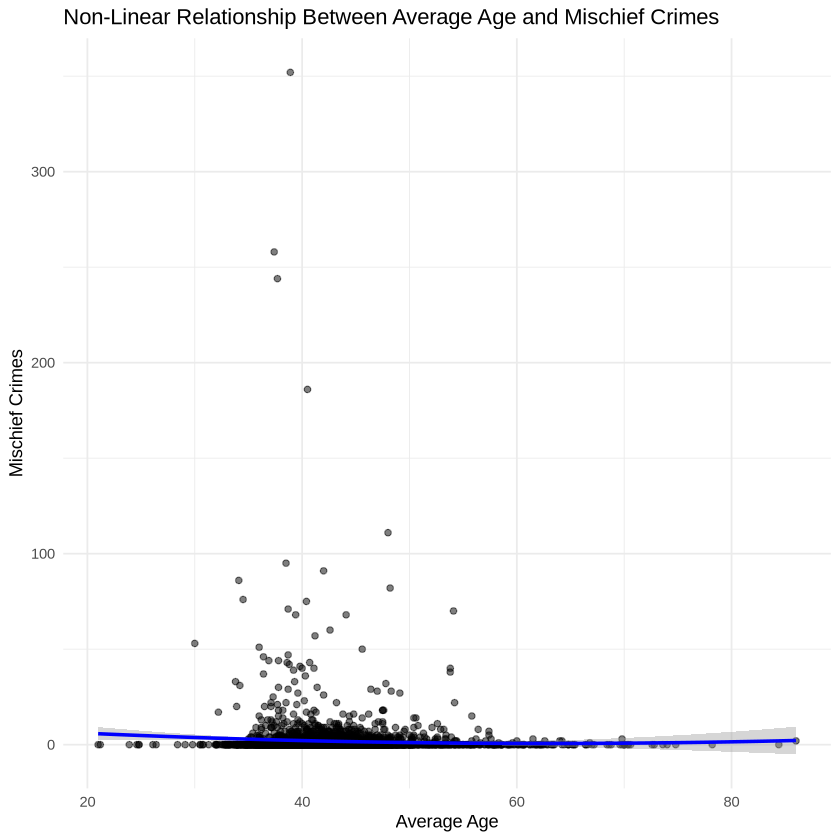

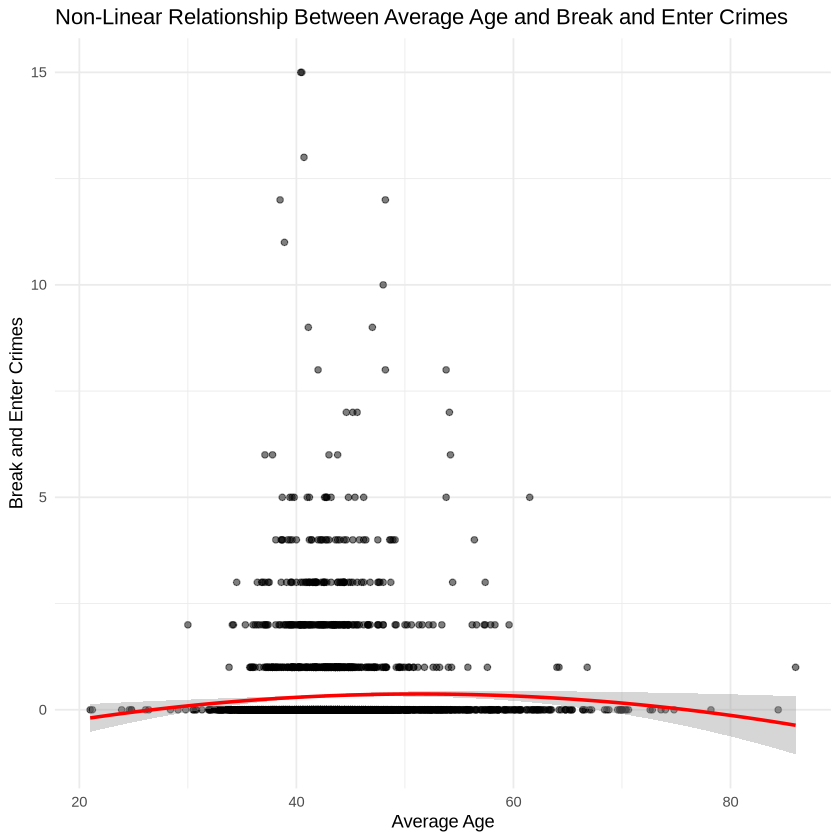

In [34]:
# Scatterplot of Average Age vs. Crime with Quadratic Fit
library(ggplot2)

# Create the scatterplot for Mischief Crimes
ggplot(filtered_data, aes(x = Average_Age, y = Mischief)) +
  geom_point(alpha = 0.5) +  # Scatter points
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = TRUE, color = "blue") +
  labs(
    title = "Non-Linear Relationship Between Average Age and Mischief Crimes",
    x = "Average Age",
    y = "Mischief Crimes"
  ) +
  theme_minimal()

# Repeat for Break and Enter Crimes
ggplot(filtered_data, aes(x = Average_Age, y = Break_and_Enter_Crime_Residential_Other)) +
  geom_point(alpha = 0.5) +  # Scatter points
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = TRUE, color = "red") +
  labs(
    title = "Non-Linear Relationship Between Average Age and Break and Enter Crimes",
    x = "Average Age",
    y = "Break and Enter Crimes"
  ) +
  theme_minimal()


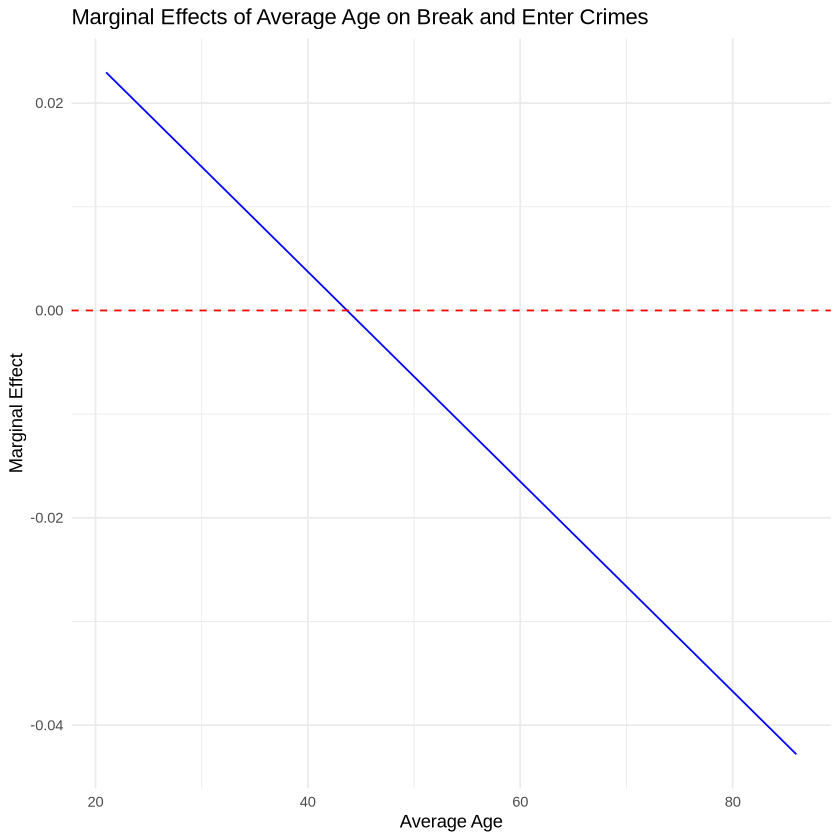

In [35]:
# Coefficients for the quadratic model
beta1 <- coef(model_quadratic_BE)["Average_Age"]
beta2 <- coef(model_quadratic_BE)["Average_Age_Squared"]

# Generate a sequence of Average Age values for analysis
avg_age_seq <- seq(min(filtered_data$Average_Age, na.rm = TRUE),
                   max(filtered_data$Average_Age, na.rm = TRUE), length.out = 100)

# Calculate marginal effects
marginal_effects <- beta1 + 2 * beta2 * avg_age_seq

# Create a dataframe for plotting
marginal_effects_df <- data.frame(Average_Age = avg_age_seq, Marginal_Effect = marginal_effects)

# Plot the marginal effects
library(ggplot2)
ggplot(marginal_effects_df, aes(x = Average_Age, y = Marginal_Effect)) +
  geom_line(color = "blue") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Marginal Effects of Average Age on Break and Enter Crimes",
    x = "Average Age",
    y = "Marginal Effect"
  ) +
  theme_minimal()

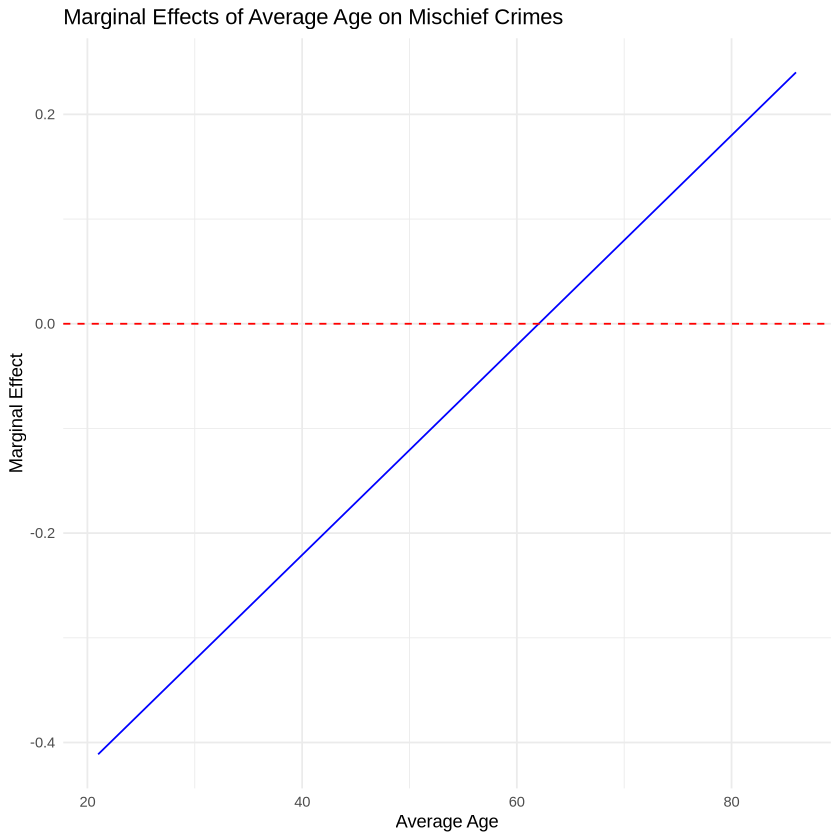

In [36]:
# Coefficients for the quadratic model (Mischief Crimes)
beta1_mischief <- coef(model_quadratic)["Average_Age"]
beta2_mischief <- coef(model_quadratic)["Average_Age_Squared"]

# Generate a sequence of Average Age values
avg_age_seq_mischief <- seq(min(filtered_data$Average_Age, na.rm = TRUE),
                            max(filtered_data$Average_Age, na.rm = TRUE), length.out = 100)

# Calculate marginal effects for Mischief Crimes
marginal_effects_mischief <- beta1_mischief + 2 * beta2_mischief * avg_age_seq_mischief

# Create a dataframe for plotting
marginal_effects_df_mischief <- data.frame(Average_Age = avg_age_seq_mischief, Marginal_Effect = marginal_effects_mischief)

# Plot the marginal effects
ggplot(marginal_effects_df_mischief, aes(x = Average_Age, y = Marginal_Effect)) +
  geom_line(color = "blue") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Marginal Effects of Average Age on Mischief Crimes",
    x = "Average Age",
    y = "Marginal Effect"
  ) +
  theme_minimal()